In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pickle
from glob import glob


In [2]:
df=pd.read_csv('HAM10000 metadata.csv')

In [3]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
from sklearn.impute import SimpleImputer
#To handle missing data in the dataset

df['age'].fillna(int(df['age'].median()),inplace=True)
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [5]:
from PIL import Image
from tqdm import tqdm
def get_image_paths():
    images = []
    # file_list = drive.ListFile({'q': f"'{base_folder_id}' in parents and trashed=false"}).GetList()
    # for file in file_list:
    #     if file['mimeType'].startswith('image'):
    #         image_paths[os.path.splitext(os.path.basename(file['title']))[0]] = file['alternateLink']
    # return image_paths
    for i_id in tqdm(df.image_id):
      image_path = 'HAM10000_images/' + i_id + '.jpg'
      image = Image.open(image_path)
      image = np.array(image.resize((80,60)))
      images.append(image)
      # plt.show(image)
      # print(image.shape)
      # plt.imshow(image)
      # break
    return images

In [6]:
imgs = get_image_paths() 

100%|██████████| 10015/10015 [02:05<00:00, 79.50it/s]


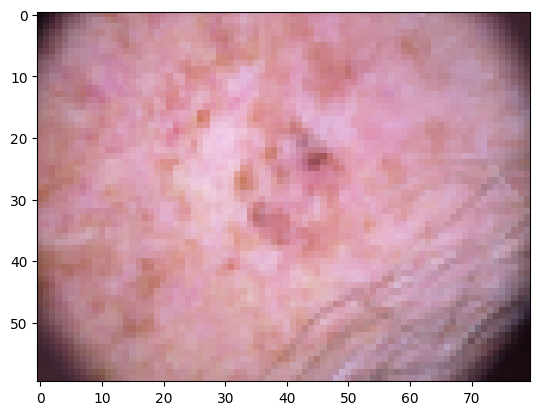

In [7]:
df['images'] = imgs

plt.imshow(df['images'][3])

In [8]:
gray_imgs = []
for image in tqdm(df['images']):
    pil_image = Image.fromarray(image)
    gray_img = np.array(pil_image.convert('L'))
    gray_imgs.append(gray_img)

100%|██████████| 10015/10015 [00:00<00:00, 20875.71it/s]


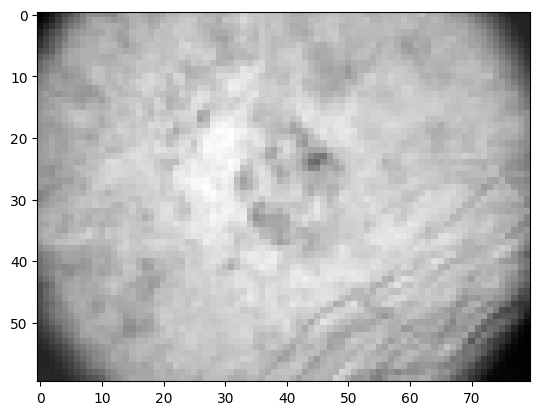

In [9]:
df['gray_images']=gray_imgs
plt.imshow(df['gray_images'][3], cmap='gray')

In [10]:
flattened_data = df['gray_images'].apply(lambda x: x.reshape(-1))
df['gray_images'] = flattened_data
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,images,gray_images
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,"[[[191, 151, 193], [191, 153, 194], [192, 152,...","[168, 169, 169, 167, 169, 167, 165, 170, 170, ..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,"[[[23, 13, 22], [24, 14, 26], [29, 17, 36], [4...","[17, 18, 23, 37, 55, 74, 91, 103, 116, 127, 14..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,"[[[185, 128, 139], [190, 133, 148], [196, 141,...","[146, 152, 159, 160, 160, 160, 161, 161, 169, ..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,"[[[23, 11, 18], [31, 16, 26], [50, 28, 39], [7...","[15, 22, 36, 55, 73, 84, 99, 117, 131, 130, 12..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,"[[[137, 93, 116], [153, 108, 132], [169, 124, ...","[109, 124, 140, 154, 162, 167, 176, 180, 185, ..."


In [11]:
filtered_df= df[df['sex'] != 'unknown']

<AxesSubplot: title={'center': 'cell type'}, xlabel='dx', ylabel='Count'>

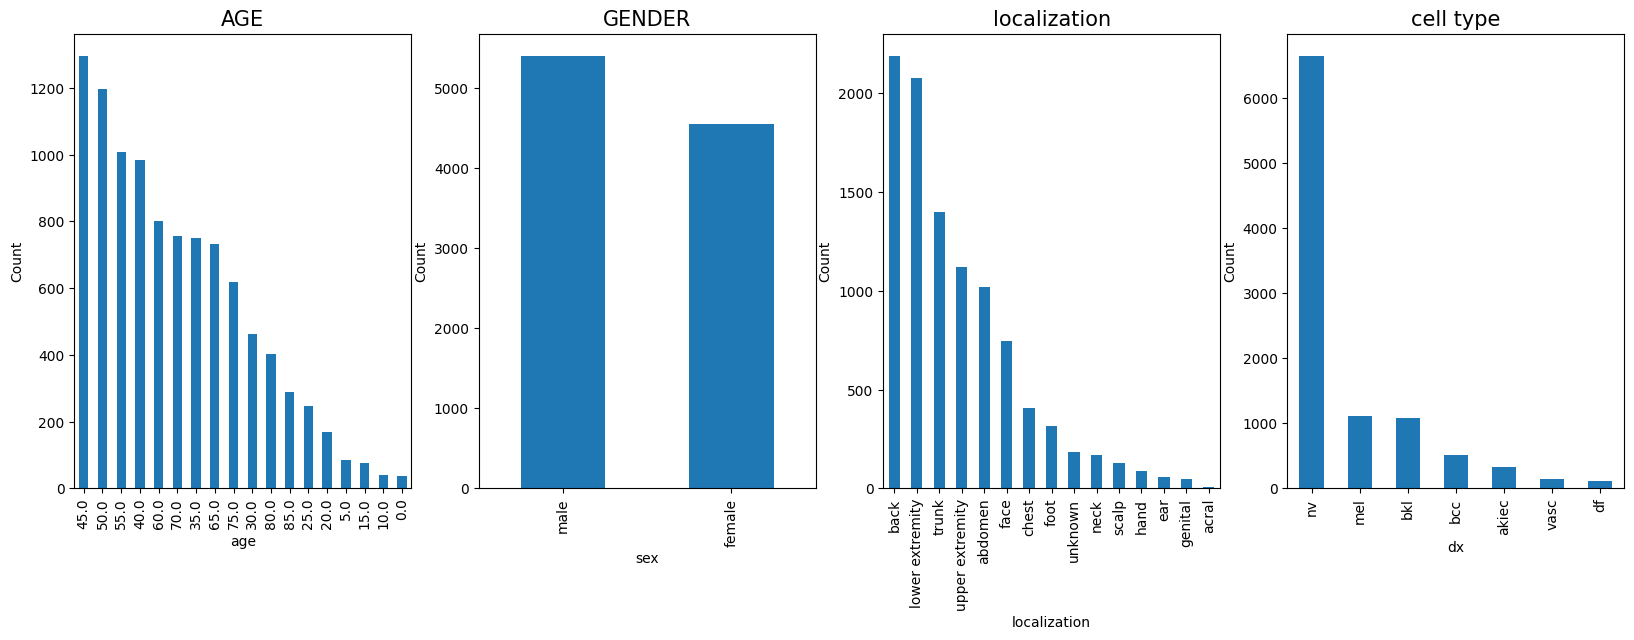

In [12]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)

plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
filtered_df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
filtered_df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
filtered_df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("cell type",fontsize=15)
plt.ylabel("Count")
filtered_df['dx'].value_counts().plot.bar()

In [13]:
from sklearn.preprocessing import LabelEncoder
filtered_df.drop(['lesion_id', 'image_id', 'images', 'dataset'], axis=1, inplace=True)
selected_columns=['dx', 'dx_type', 'age', 'sex', 'localization']
encoder=LabelEncoder()

for column in tqdm(selected_columns):
    filtered_df[column] = encoder.fit_transform(filtered_df[column])

filtered_df.head()

/var/folders/bg/27vkrfwx4lgdlyv721___y880000gn/T/ipykernel_69297/606654259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['lesion_id', 'image_id', 'images', 'dataset'], axis=1, inplace=True)


  0%|          | 0/5 [00:00<?, ?it/s]/var/folders/bg/27vkrfwx4lgdlyv721___y880000gn/T/ipykernel_69297/606654259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column] = encoder.fit_transform(filtered_df[column])
/var/folders/bg/27vkrfwx4lgdlyv721___y880000gn/T/ipykernel_69297/606654259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column] = encoder.fit_transform(filtered_df[column])
/var/folders/bg/27vkrfwx4lgdlyv721___y880000gn/T/ipykernel_69297/606654259.py:7: SettingWit

,dx,dx_type,age,sex,localization,gray_images
0,2,3,16,1,11,"[168, 169, 169, 167, 169, 167, 165, 170, 170, ..."
1,2,3,16,1,11,"[17, 18, 23, 37, 55, 74, 91, 103, 116, 127, 14..."
2,2,3,16,1,11,"[146, 152, 159, 160, 160, 160, 161, 161, 169, ..."
3,2,3,16,1,11,"[15, 22, 36, 55, 73, 84, 99, 117, 131, 130, 12..."
4,2,3,15,1,4,"[109, 124, 140, 154, 162, 167, 176, 180, 185, ..."


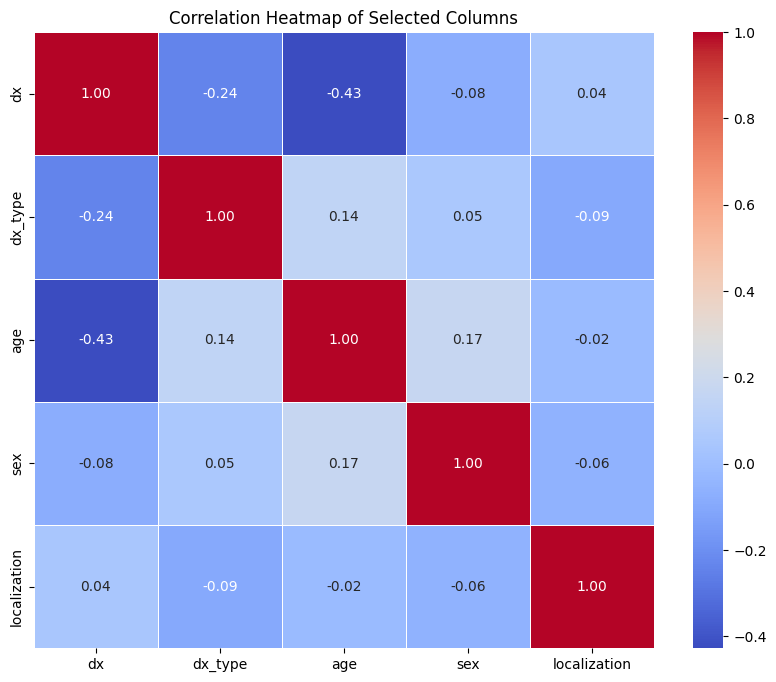

In [14]:
selected_data=filtered_df[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [15]:
expanded_pixels = np.array(filtered_df['gray_images'].tolist())
column_names = [f'pixel_{i}' for i in range(expanded_pixels.shape[1])]
filtered_df.reset_index(drop=True, inplace=True)
expanded_df = pd.DataFrame(expanded_pixels, columns=column_names)
final_df = pd.concat([filtered_df, expanded_df], axis=1)
final_df.shape


(9958, 4806)

In [16]:
final_df.head()

,dx,dx_type,age,sex,localization,gray_images,pixel_0,pixel_1,pixel_2,pixel_3,...,pixel_4790,pixel_4791,pixel_4792,pixel_4793,pixel_4794,pixel_4795,pixel_4796,pixel_4797,pixel_4798,pixel_4799
0,2,3,16,1,11,"[168, 169, 169, 167, 169, 167, 165, 170, 170, ...",168,169,169,167,...,144,146,142,146,153,156,165,166,168,161
1,2,3,16,1,11,"[17, 18, 23, 37, 55, 74, 91, 103, 116, 127, 14...",17,18,23,37,...,73,60,44,30,22,20,19,20,20,18
2,2,3,16,1,11,"[146, 152, 159, 160, 160, 160, 161, 161, 169, ...",146,152,159,160,...,132,139,140,140,140,135,131,129,116,89
3,2,3,16,1,11,"[15, 22, 36, 55, 73, 84, 99, 117, 131, 130, 12...",15,22,36,55,...,58,46,30,20,18,17,18,17,16,14
4,2,3,15,1,4,"[109, 124, 140, 154, 162, 167, 176, 180, 185, ...",109,124,140,154,...,196,191,177,170,160,143,125,106,78,47


In [17]:
Y=final_df['dx']

In [18]:
Y.shape

(9958,)

In [19]:
X=final_df.copy(deep=True)
X.drop(['dx', 'gray_images'], axis=1, inplace=True)
X.head()

,dx_type,age,sex,localization,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,...,pixel_4790,pixel_4791,pixel_4792,pixel_4793,pixel_4794,pixel_4795,pixel_4796,pixel_4797,pixel_4798,pixel_4799
0,3,16,1,11,168,169,169,167,169,167,...,144,146,142,146,153,156,165,166,168,161
1,3,16,1,11,17,18,23,37,55,74,...,73,60,44,30,22,20,19,20,20,18
2,3,16,1,11,146,152,159,160,160,160,...,132,139,140,140,140,135,131,129,116,89
3,3,16,1,11,15,22,36,55,73,84,...,58,46,30,20,18,17,18,17,16,14
4,3,15,1,4,109,124,140,154,162,167,...,196,191,177,170,160,143,125,106,78,47


In [20]:
X.shape

(9958, 4804)

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled = np.array(scaler.fit_transform(X))
X_scaled.shape

(9958, 4804)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, np.array(Y), test_size=0.2, random_state=42)
#X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, np.array(Y), test_size=0.2, random_state=42)

In [23]:
selected_data_train = X_train[ : , 4:]
selected_data_test = X_test[: , 4:]
other_data_train = X_train[:, :4]
other_data_test = X_test[:, :4]

pca = PCA(n_components=100)

pca.fit(selected_data_train)

transformed_data_train = pca.transform(selected_data_train)
transformed_data_test = pca.transform(selected_data_test)

X_train_updated = np.hstack((other_data_train, transformed_data_train))
X_test_updated = np.hstack((other_data_test, transformed_data_test))

In [24]:
X_train_updated.shape

(7966, 104)

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import InstanceHardnessThreshold, EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
classifier = RandomForestClassifier(n_estimators=200, criterion='gini' , max_leaf_nodes=None, max_depth = 30, min_impurity_decrease = 0.001, ccp_alpha=0.001, random_state=42)

classifier.fit(X_train_updated, Y_train)
Y_pred = classifier.predict(X_test_updated)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6721887550200804
Precision: 0.16123189594639822
Recall: 0.14581788803345688
F1 Score: 0.12102848962270697
Confusion Matrix:
 [[   0    2    0    0    0   63    0]
 [   0    0    0    0    1   90    0]
 [   0    0    0    0    3  222    0]
 [   0    0    0    0    0   29    0]
 [   0    0    0    0    5  220    0]
 [   0    0    0    0    2 1334    0]
 [   0    0    0    0    0   21    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       225
           3       0.00      0.00      0.00        29
           4       0.45      0.02      0.04       225
           5       0.67      1.00      0.80      1336
           6       0.00      0.00      0.00        21

    accuracy                           0.67      1992
   macro avg       0.16      0.15      0.12      1992
weighted avg       0.50      0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [27]:
class_counts = np.bincount(Y_train)

print("Class Counts:")
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count}")

Class Counts:
Class 0: 262
Class 1: 423
Class 2: 864
Class 3: 86
Class 4: 888
Class 5: 5322
Class 6: 121


In [28]:
classifier = RandomForestClassifier(n_estimators=500, criterion='gini' , max_leaf_nodes=None, max_depth = 50, min_impurity_decrease = 0.001, ccp_alpha=0.00001, random_state=42)

sampling_strategy = {0: 800, 1:1000, 2: 1500, 3: 400, 4: 1500, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 2000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_oversampled, Y_train_oversampled)

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7103413654618473
Precision: 0.45357905278596705
Recall: 0.3296342125111188
F1 Score: 0.3201671141357954
Confusion Matrix:
 [[  38    9    2    0    1   15    0]
 [  19   34    7    0    1   30    0]
 [  38   21   37    0    4  123    2]
 [   1    2    0    3    1   22    0]
 [  20    7   18    0   16  164    0]
 [   8   20   11    3    3 1286    5]
 [   1    1    0    0    0   18    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.58      0.40        65
           1       0.36      0.37      0.37        91
           2       0.49      0.16      0.25       225
           3       0.50      0.10      0.17        29
           4       0.62      0.07      0.13       225
           5       0.78      0.96      0.86      1336
           6       0.12      0.05      0.07        21

    accuracy                           0.71      1992
   macro avg       0.45      0.33      0.32      1992
weighted avg       0.68      0.7

In [29]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.001, algorithm='SAMME', random_state=0)

desired_count = 3000
desired_count_class_5 = sum(Y_train==5)
sampling_strategy = {cls: desired_count if cls != 5 else desired_count_class_5 for cls in set(Y_train)}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = desired_count

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')  # 'macro' for multiclass
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.45732931726907633
Precision: 0.1389611652283418
Recall: 0.23331907613344738
F1 Score: 0.12321371005061817
Confusion Matrix:
 [[ 65   0   0   0   0   0   0]
 [ 91   0   0   0   0   0   0]
 [170   0   0   0   0  55   0]
 [ 12   0   0   0   0  17   0]
 [225   0   0   0   0   0   0]
 [490   0   0   0   0 846   0]
 [ 11   0   0   0   0  10   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      1.00      0.12        65
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       225
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       225
           5       0.91      0.63      0.75      1336
           6       0.00      0.00      0.00        21

    accuracy                           0.46      1992
   macro avg       0.14      0.23      0.12      1992
weighted avg       0.61      0.46      0.50      1992



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [30]:
from sklearn.svm import SVC
# Initialize the SVM classifier
classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced')

desired_count = 3000
desired_count_class_5 = sum(Y_train==5)
sampling_strategy = {cls: desired_count if cls != 5 else desired_count_class_5 for cls in set(Y_train)}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = desired_count

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.45933734939759036
Precision: 0.2917657784055942
Recall: 0.39361734208552884
F1 Score: 0.2941500909972011
Confusion Matrix:
 [[ 26  24   5   4   4   0   2]
 [ 18  48   9   1   8   3   4]
 [ 30  29  64  16  46  17  23]
 [  4   7   3   9   4   1   1]
 [  7   8  41   3 102  42  22]
 [ 33 105  94  60 183 660 201]
 [  2   2   1   2   2   6   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.40      0.28        65
           1       0.22      0.53      0.31        91
           2       0.29      0.28      0.29       225
           3       0.09      0.31      0.15        29
           4       0.29      0.45      0.36       225
           5       0.91      0.49      0.64      1336
           6       0.02      0.29      0.04        21

    accuracy                           0.46      1992
   macro avg       0.29      0.39      0.29      1992
weighted avg       0.69      0.46      0.53      1992



In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

desired_count = 3000
desired_count_class_5 = sum(Y_train==5)
sampling_strategy = {cls: desired_count if cls != 5 else desired_count_class_5 for cls in set(Y_train)}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = desired_count

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.6807228915662651
Precision: 0.31459210390228104
Recall: 0.23579731170834675
F1 Score: 0.24763071495854586
Confusion Matrix:
 [[  11   18    9    0    0   27    0]
 [   7   20   13    2    0   49    0]
 [   4   14   54    1    8  144    0]
 [   1    3    4    0    1   20    0]
 [   1    5   27    0   19  172    1]
 [   2   22   38    4   17 1252    1]
 [   0    1    0    0    0   20    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.17      0.24        65
           1       0.24      0.22      0.23        91
           2       0.37      0.24      0.29       225
           3       0.00      0.00      0.00        29
           4       0.42      0.08      0.14       225
           5       0.74      0.94      0.83      1336
           6       0.00      0.00      0.00        21

    accuracy                           0.68      1992
   macro avg       0.31      0.24      0.25      1992
weighted avg       0.61      0

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Logistic Regression classifier
classifier = LogisticRegression(solver='liblinear', random_state=42)

# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.7259036144578314
Precision: 0.4028882179285281
Recall: 0.2895500055303601
F1 Score: 0.3093332755570734
Confusion Matrix:
 [[   8   22    4    0    7   24    0]
 [   1   36    8    2    9   35    0]
 [   7   23   47    0   32  116    0]
 [   0    0    0    1    2   26    0]
 [   6    6    7    0   68  138    0]
 [   1    7   10    1   30 1286    1]
 [   0    2    1    0    2   16    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.18        65
           1       0.38      0.40      0.39        91
           2       0.61      0.21      0.31       225
           3       0.25      0.03      0.06        29
           4       0.45      0.30      0.36       225
           5       0.78      0.96      0.86      1336
           6       0.00      0.00      0.00        21

    accuracy                           0.73      1992
   macro avg       0.40      0.29      0.31      1992
weighted avg       0.68      0.73

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Optionally, scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_updated)
X_test_scaled = scaler.transform(X_test_updated)

# Initialize the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

desired_count = 3000
desired_count_class_5 = sum(Y_train==5)
sampling_strategy = {cls: desired_count if cls != 5 else desired_count_class_5 for cls in set(Y_train)}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = desired_count

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)
# Train the classifier
classifier.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_scaled)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.6892570281124498
Precision: 0.37161913250699896
Recall: 0.347458293323312
F1 Score: 0.3573809604302266
Confusion Matrix:
 [[  18   14   10    1    6   15    1]
 [  13   38   11    1   10   18    0]
 [  11   23   70    4   38   77    2]
 [   0    5    8    6    3    6    1]
 [   7    6   37    0   66  107    2]
 [   5   11   59    7   70 1174   10]
 [   1    0    3    1    3   12    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.28      0.30        65
           1       0.39      0.42      0.40        91
           2       0.35      0.31      0.33       225
           3       0.30      0.21      0.24        29
           4       0.34      0.29      0.31       225
           5       0.83      0.88      0.86      1336
           6       0.06      0.05      0.05        21

    accuracy                           0.69      1992
   macro avg       0.37      0.35      0.36      1992
weighted avg       0.67      0.69

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Gaussian Naive Bayes classifier
classifier = GaussianNB()

desired_count = 3000
desired_count_class_5 = sum(Y_train==5)
sampling_strategy = {cls: desired_count if cls != 5 else desired_count_class_5 for cls in set(Y_train)}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = desired_count

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.5245983935742972
Precision: 0.2620488977021543
Recall: 0.345407844157586
F1 Score: 0.25766846751896727
Confusion Matrix:
 [[ 10  36   0   6  12   1   0]
 [  8  54   0  10  16   3   0]
 [ 22  70  17  33  44  36   3]
 [  0   7   2  13   3   4   0]
 [  9  66   0   5 105  40   0]
 [ 18 126  86 139 108 845  14]
 [  1   1   2   2   1  13   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.15      0.15        65
           1       0.15      0.59      0.24        91
           2       0.16      0.08      0.10       225
           3       0.06      0.45      0.11        29
           4       0.36      0.47      0.41       225
           5       0.90      0.63      0.74      1336
           6       0.06      0.05      0.05        21

    accuracy                           0.52      1992
   macro avg       0.26      0.35      0.26      1992
weighted avg       0.67      0.52      0.57      1992



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.6475903614457831
Precision: 0.3107496162792759
Recall: 0.32940288138423884
F1 Score: 0.3168154393219446
Confusion Matrix:
 [[  17   15   12    2    4   14    1]
 [  18   24   18    5   14   12    0]
 [  22   27   73    7   37   50    9]
 [   1    1    6    6    4    9    2]
 [  16   20   42    0   63   79    5]
 [   8   42   71    7   83 1104   21]
 [   1    1    4    0    3    9    3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.26      0.23        65
           1       0.18      0.26      0.22        91
           2       0.32      0.32      0.32       225
           3       0.22      0.21      0.21        29
           4       0.30      0.28      0.29       225
           5       0.86      0.83      0.85      1336
           6       0.07      0.14      0.10        21

    accuracy                           0.65      1992
   macro avg       0.31      0.33      0.32      1992
weighted avg       0.67      0.6

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting Classifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

sampling_strategy = {0: 700, 1:900, 2: 1500, 3: 400, 4: 1500, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)


# Train the classifier
classifier.fit(X_train_updated, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test_updated)

# Calculate evaluation metrics

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.7469879518072289
Precision: 0.4937615245766058
Recall: 0.35453686772866144
F1 Score: 0.3936937035079385
Confusion Matrix:
 [[  13   21   11    0    8   12    0]
 [   5   34   18    0    9   25    0]
 [   7   14   81    0   44   76    3]
 [   0    0    2    6    2   19    0]
 [   3    2   25    1   76  118    0]
 [   0   11   13    1   28 1277    6]
 [   0    0    2    1    2   15    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.20      0.28        65
           1       0.41      0.37      0.39        91
           2       0.53      0.36      0.43       225
           3       0.67      0.21      0.32        29
           4       0.45      0.34      0.39       225
           5       0.83      0.96      0.89      1336
           6       0.10      0.05      0.06        21

    accuracy                           0.75      1992
   macro avg       0.49      0.35      0.39      1992
weighted avg       0.71      0.7

In [37]:
from xgboost import XGBClassifier

classifier=XGBClassifier()

sampling_strategy = {0: 700, 1:900, 2: 1800, 3: 400, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.732429718875502
Precision: 0.5113431886728922
Recall: 0.4335883576681783
F1 Score: 0.4430467881929753
Confusion Matrix:
 [[  16   14   22    1    8    4    0]
 [   3   50   18    0   14    6    0]
 [   7   20  110    0   60   27    1]
 [   0    2    5    9    3   10    0]
 [   7    8   34    0  119   57    0]
 [   1   20   39    4  117 1154    1]
 [   1    0    5    1    1   12    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.25      0.32        65
           1       0.44      0.55      0.49        91
           2       0.47      0.49      0.48       225
           3       0.60      0.31      0.41        29
           4       0.37      0.53      0.44       225
           5       0.91      0.86      0.89      1336
           6       0.33      0.05      0.08        21

    accuracy                           0.73      1992
   macro avg       0.51      0.43      0.44      1992
weighted avg       0.75      0.73 

CROSS FOLD VALIDATION

In [38]:
from sklearn.model_selection import cross_val_score, KFold
classifier = XGBClassifier(objective='multi:softmax', num_class=7)

sampling_strategy = {0: 1000, 1:1200, 2: 1800, 3: 600, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_resampled, Y_train_resampled, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Cross-validation scores: [0.96690476 0.97404762 0.97738095 0.97047619 0.9747619 ]
Mean CV accuracy: 0.9727142857142856
Accuracy: 0.7409638554216867
Precision: 0.5056474152685059
Recall: 0.44676348380486897
F1 Score: 0.4600803101825131
Confusion Matrix:
 [[  19   15   16    0    9    6    0]
 [   6   44   18    2   16    5    0]
 [   8   22  111    0   57   27    0]
 [   0    1    6   11    4    6    1]
 [   8    4   26    0  126   60    1]
 [   1   14   33    2  119 1164    3]
 [   1    0    5    1    5    8    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.29      0.35        65
           1       0.44      0.48      0.46        91
           2       0.52      0.49      0.50       225
           3       0.69      0.38      0.49        29
           4       0.38      0.56      0.45       225
           5       0.91      0.87      0.89      1336
           6       0.17      0.05      0.07        21

    accuracy         

In [39]:
from sklearn.model_selection import cross_val_score, KFold
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
sampling_strategy = {0: 1000, 1:1200, 2: 1800, 3: 600, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_resampled, Y_train_resampled, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Cross-validation scores: [0.8752381  0.88119048 0.88190476 0.89047619 0.88833333]
Mean CV accuracy: 0.8834285714285715
Accuracy: 0.6651606425702812
Precision: 0.40063591560620876
Recall: 0.4888659219571287
F1 Score: 0.4275258678473776
Confusion Matrix:
 [[  25   29    7    1    3    0    0]
 [  14   50   11    4   12    0    0]
 [  23   37   79    5   60   12    9]
 [   2    2    2   18    4    1    0]
 [  16   18   31    0  126   31    3]
 [   5   44   68   10  156 1023   30]
 [   1    2    4    1    5    4    4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.38      0.33        65
           1       0.27      0.55      0.37        91
           2       0.39      0.35      0.37       225
           3       0.46      0.62      0.53        29
           4       0.34      0.56      0.43       225
           5       0.96      0.77      0.85      1336
           6       0.09      0.19      0.12        21

    accuracy         

In [40]:
from sklearn.model_selection import cross_val_score, KFold
classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)
sampling_strategy = {0: 1000, 1:1200, 2: 1800, 3: 600, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_resampled, Y_train_resampled, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Cross-validation scores: [0.95380952 0.95       0.95809524 0.95261905 0.96119048]
Mean CV accuracy: 0.955142857142857
Accuracy: 0.5868473895582329
Precision: 0.3071617289912486
Recall: 0.3380889308555159
F1 Score: 0.31503893970825475
Confusion Matrix:
 [[ 24  16  13   0   8   4   0]
 [ 15  29  22   3  12   8   2]
 [ 15  35  85   6  46  34   4]
 [  4   1  11   4   2   3   4]
 [  9  11  50   2  94  52   7]
 [ 13  30 152   9 148 932  52]
 [  0   1   4   2   2  11   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.37      0.33        65
           1       0.24      0.32      0.27        91
           2       0.25      0.38      0.30       225
           3       0.15      0.14      0.15        29
           4       0.30      0.42      0.35       225
           5       0.89      0.70      0.78      1336
           6       0.01      0.05      0.02        21

    accuracy                           0.59      1992
   macro avg     

In [41]:
from sklearn.model_selection import cross_val_score, KFold
classifier = RandomForestClassifier(n_estimators=500, criterion='gini' , max_leaf_nodes=None, max_depth = 50, min_impurity_decrease = 0.001, ccp_alpha=0.00001, random_state=42)
sampling_strategy = {0: 1000, 1:1200, 2: 1800, 3: 600, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_updated, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 3000

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_overresampled, Y_train_overresampled)

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_resampled, Y_train_resampled, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Cross-validation scores: [0.87880952 0.87285714 0.8902381  0.88357143 0.90380952]
Mean CV accuracy: 0.8858571428571429
Accuracy: 0.6470883534136547
Precision: 0.4787955391018297
Recall: 0.47916883946248856
F1 Score: 0.431390167682641
Confusion Matrix:
 [[ 32  27   2   0   4   0   0]
 [  8  61   4   0  16   2   0]
 [ 23  48  65   0  72  17   0]
 [  2   4   4   8   5   6   0]
 [ 15  20  10   0 162  18   0]
 [  5  78  34   3 242 957  17]
 [  0   3   3   0   5   6   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.49      0.43        65
           1       0.25      0.67      0.37        91
           2       0.53      0.29      0.37       225
           3       0.73      0.28      0.40        29
           4       0.32      0.72      0.44       225
           5       0.95      0.72      0.82      1336
           6       0.19      0.19      0.19        21

    accuracy                           0.65      1992
   macro avg     

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()


# Fit the model on the training data
classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_updated)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.4598393574297189
Precision: 0.30026600027681394
Recall: 0.4204919306625746
F1 Score: 0.29726586447798237
Confusion Matrix:
 [[ 28  27   3   4   1   0   2]
 [ 20  46   4   9   9   2   1]
 [ 39  37  56  14  34  22  23]
 [  4   2   1  14   1   2   5]
 [ 22  14  27   7 100  39  16]
 [ 29  66  80 124 156 665 216]
 [  0   1   1   6   3   3   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.43      0.27        65
           1       0.24      0.51      0.32        91
           2       0.33      0.25      0.28       225
           3       0.08      0.48      0.14        29
           4       0.33      0.44      0.38       225
           5       0.91      0.50      0.64      1336
           6       0.03      0.33      0.05        21

    accuracy                           0.46      1992
   macro avg       0.30      0.42      0.30      1992
weighted avg       0.70      0.46      0.53      1992



AUTOENCODERS WITH XGBOOST

In [43]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 400  # Example: reduce to 2 dimensions

# Define the input layer
input_data = Input(shape=(X_train_scaled.shape[1],))

# Define the encoder layers
encoded = Dense(8, activation='relu')(input_data)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define the decoder layers
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(X_train_scaled.shape[1], activation='linear')(decoded)

# Create the autoencoder model
autoencoder = Model(input_data, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Extract the encoder model
encoder = Model(input_data, encoded)

X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)





2024-05-13 11:16:15.089662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


63/63 [==============================] - 0s 1ms/step


In [44]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

sampling_strategy = {0: 700, 1:900, 2: 1800, 3: 400, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_encoded, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 2500

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_oversampled, Y_train_oversampled)

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_encoded)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6034136546184738
Precision: 0.24519970260886564
Recall: 0.2656438117107419
F1 Score: 0.25204303054604477
Confusion Matrix:
 [[   9   14   15    2   16    9    0]
 [  11   11   26   10   22   11    0]
 [  24   16   46   14   55   63    7]
 [   0    1    4    7    1   14    2]
 [  13   24   40    9   71   64    4]
 [  12   30   99   11  108 1057   19]
 [   1    1    3    1    4   10    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.14      0.13        65
           1       0.11      0.12      0.12        91
           2       0.20      0.20      0.20       225
           3       0.13      0.24      0.17        29
           4       0.26      0.32      0.28       225
           5       0.86      0.79      0.82      1336
           6       0.03      0.05      0.04        21

    accuracy                           0.60      1992
   macro avg       0.25      0.27      0.25      1992
weighted avg       0.64      0.

In [45]:
classifier=XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

sampling_strategy = {0: 700, 1:900, 2: 1800, 3: 400, 4: 1800, 6: 700}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state = 42)
enn = EditedNearestNeighbours()

X_oversampled, Y_oversampled = smote.fit_resample(X_train_encoded, Y_train)
X_train_oversampled, Y_train_oversampled = enn.fit_resample(X_oversampled, Y_oversampled)

# oversampler = RandomOverSampler(sampling_strategy=sampling_strategy)

# X_train_overresampled, Y_train_overresampled = oversampler.fit_resample(X_train_updated, Y_train)

desired_count_class_5 = 2500

sampling_strategy = {5: desired_count_class_5}

# Initialize RandomUnderSampler with specified sampling strategy
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_oversampled, Y_train_oversampled)

classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = classifier.predict(X_test_encoded)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, Y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6049196787148594
Precision: 0.24584935357551596
Recall: 0.259656695378798
F1 Score: 0.2502473210583685
Confusion Matrix:
 [[   8   19   12    4   14    8    0]
 [  15   18   20    5   20   12    1]
 [  21   20   54   14   53   57    6]
 [   1    1    2    4    2   16    3]
 [  12   22   41    8   63   74    5]
 [  12   35   82   14  108 1057   28]
 [   1    1    2    0    5   11    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.12      0.12        65
           1       0.16      0.20      0.17        91
           2       0.25      0.24      0.25       225
           3       0.08      0.14      0.10        29
           4       0.24      0.28      0.26       225
           5       0.86      0.79      0.82      1336
           6       0.02      0.05      0.03        21

    accuracy                           0.60      1992
   macro avg       0.25      0.26      0.25      1992
weighted avg       0.64      0.60

Approach using CNNs

In [46]:
temp_df=df[df['sex'] != 'unknown']
X_images=temp_df['images']
X_image_flat = np.asarray(X_images.tolist())

X_image_mean = np.mean(X_image_flat)
X_image_std = np.std(X_image_flat)

X_images = (X_image_flat - X_image_mean)/X_image_std
X_images.shape

(9958, 60, 80, 3)

In [47]:
from tensorflow.keras.utils import to_categorical
Y_images=temp_df['dx']
encoder=LabelEncoder()
Y_images=encoder.fit_transform(Y_images)
Y_images = to_categorical(Y_images, num_classes=7)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X_images,Y_images,test_size=0.2,random_state=42,shuffle=True)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Dropout, Flatten, BatchNormalization


model=Sequential()
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(60, 80, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

model.add(Dense(units=7, activation='softmax', name='classifier'))
model.compile(Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])





In [50]:
history = model.fit(X_train,
                    Y_train ,
                    epochs=50 ,
                    batch_size=7,
                    validation_data=(X_test , Y_test) ,
                    )

Epoch 1/50
1138/1138 [==============================] - 58s 49ms/step - loss: 1.0874 - accuracy: 0.6604 - val_loss: 0.9879 - val_accuracy: 0.6707
Epoch 2/50
1138/1138 [==============================] - 54s 48ms/step - loss: 1.0190 - accuracy: 0.6681 - val_loss: 0.9899 - val_accuracy: 0.6707
Epoch 3/50
1138/1138 [==============================] - 56s 49ms/step - loss: 1.0004 - accuracy: 0.6681 - val_loss: 0.9645 - val_accuracy: 0.6707
Epoch 4/50
1138/1138 [==============================] - 55s 48ms/step - loss: 1.0004 - accuracy: 0.6681 - val_loss: 0.9825 - val_accuracy: 0.6707
Epoch 5/50
1138/1138 [==============================] - 55s 48ms/step - loss: 0.9710 - accuracy: 0.6685 - val_loss: 0.9030 - val_accuracy: 0.6797
Epoch 6/50
1138/1138 [==============================] - 60s 53ms/step - loss: 0.9551 - accuracy: 0.6740 - val_loss: 0.8987 - val_accuracy: 0.6707
Epoch 7/50
1138/1138 [==============================] - 208s 183ms/step - loss: 0.9393 - accuracy: 0.6698 - val_loss: 0.8785

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

63/63 [==============================] - 3s 47ms/step - loss: 0.8510 - accuracy: 0.6903
Test Accuracy: 0.6902610659599304
Test Loss: 0.8510441780090332


In [52]:
y_pred = model.predict(X_test)

63/63 [==============================] - 3s 49ms/step


In [53]:
y_pred_rounded = np.round(y_pred)

In [54]:
f1 = f1_score(Y_test, y_pred_rounded, average='micro') # or 'macro', 'weighted', etc. depending on your needs
print("F1 Score:", f1)

F1 Score: 0.6678921568627451


In [55]:
precision = precision_score(Y_test, y_pred_rounded, average='micro')
recall = recall_score(Y_test, y_pred_rounded, average='micro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8569182389937107
Recall: 0.5471887550200804


In [56]:
from tensorflow.keras.utils import plot_model

model.summary
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


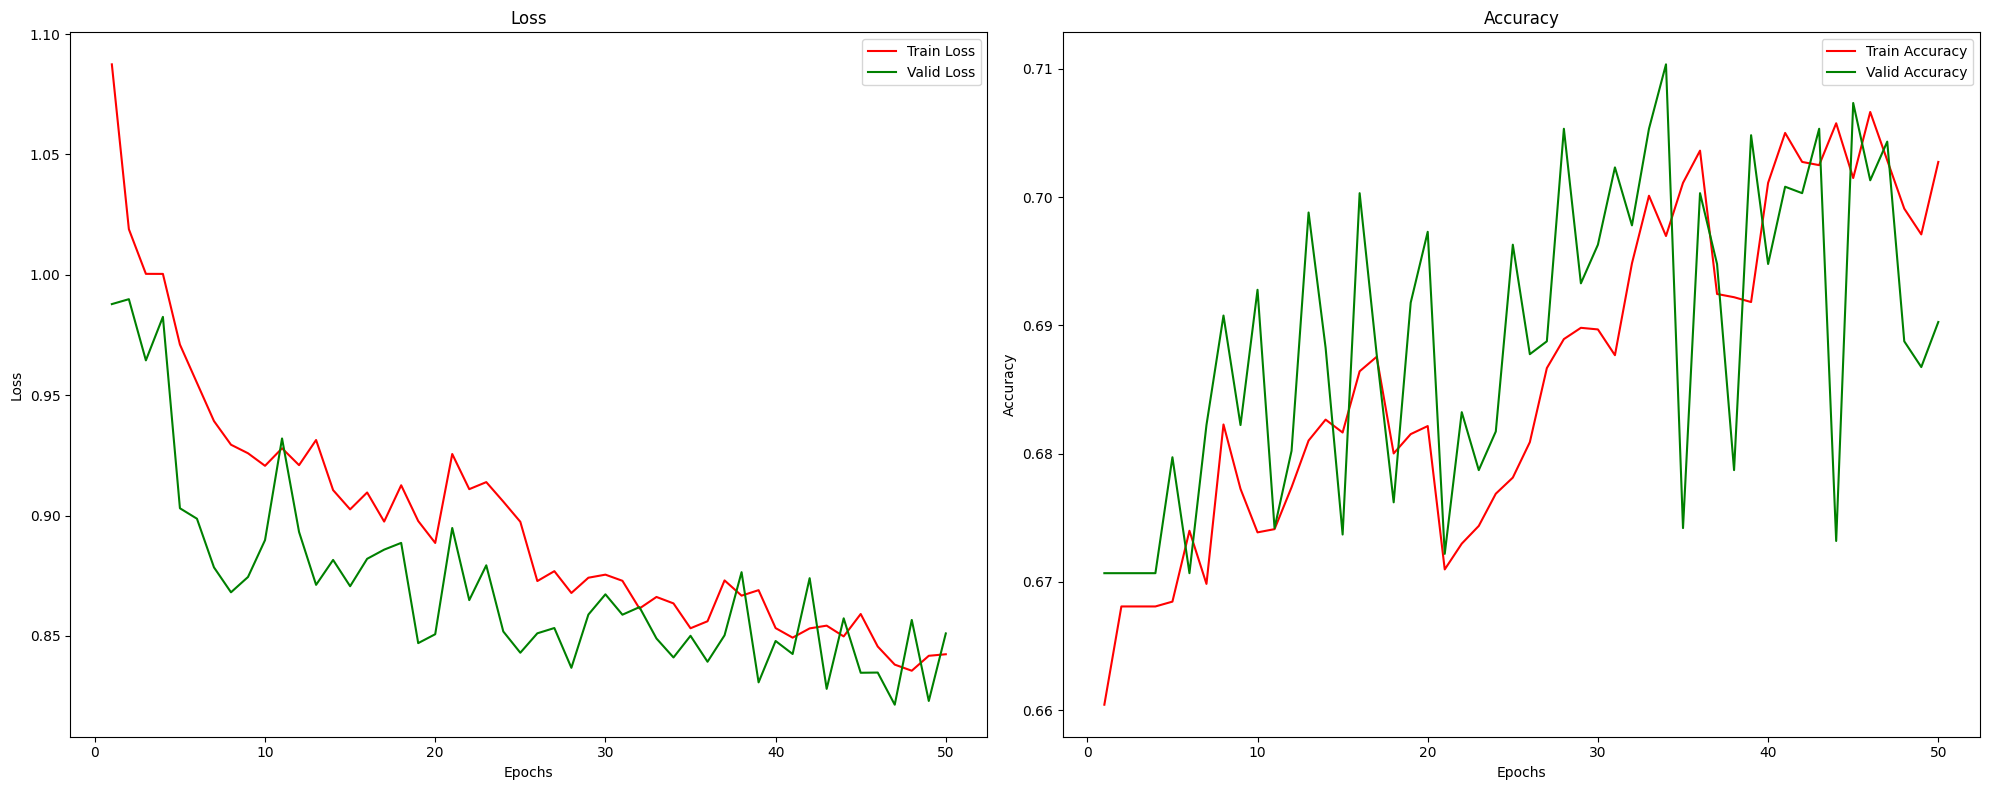

In [57]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()